<a href="https://colab.research.google.com/github/maygp/IFPB-TopicosEspeciais/blob/main/1_Ionosphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from collections import Counter
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/maygp/IFPB-TopicosEspeciais/main/datasets/ionosphere-ajustada.data"

# Carregar base de dados
dataset = pd.read_csv(url, header=None)

columns = len(dataset.columns)

y = dataset[0] # extrai a primeira coluna, que é o label
X = dataset.loc[:,1:columns-1]

# Transforma para Array NumPy
X = np.array(X)
y = np.array(y)

In [118]:
from sklearn.model_selection import StratifiedKFold

folds = 10

kf = StratifiedKFold(n_splits = folds)

## 10 conjuntos de dados
X_train = []
y_train = []

X_test = []
y_test = []

for train_index, test_index in kf.split(X,y):

  X_train.append(X[train_index])
  X_test.append(X[test_index])

  y_train.append(y[train_index])
  y_test.append(y[test_index])

In [119]:
#CONFIG KMEANS
myset = set(y) # Cria um conjunto. Nesse caso [0,1]
clusters = len(myset) # quantidade de clusters (2)

#LISTAS DE RESULTADOS
results_ionosphere = {
    'TREE GINI': [],
    'TREE ENTROPY': [],
    '5NN': [],
    '10NN': [],
    'MLP RELU_1': [],
    'MLP RELU_2': [],
    'MLP TANH_1': [],
    'MLP TANH_2': [],
    'KMEANS': []
}

for i in range(folds):

  # ÁRVORE DE DECISÃO - GINI
  modelTreeGini = tree.DecisionTreeClassifier(criterion="gini", max_depth=3) #setando critérios | random_state?
  modelTreeGini = modelTreeGini.fit(X_train[i], y_train[i]) #treinamento
  resultTreeGini = modelTreeGini.predict(X_test[i]) #predição
  accTreeGini = metrics.accuracy_score(resultTreeGini, y_test[i]) #verificação da acurácia
  results_ionosphere['TREE GINI'].append(round(accTreeGini * 100)) #resultado

  # ÁRVORE DE DECISÃO - ENTROPY
  modelTreeEntropy = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
  modelTreeEntropy =  modelTreeEntropy.fit(X_train[i], y_train[i])
  resultTreeEntropy =  modelTreeEntropy.predict(X_test[i])
  accTreeEntropy = metrics.accuracy_score(resultTreeEntropy, y_test[i])
  results_ionosphere['TREE ENTROPY'].append(round(accTreeEntropy * 100))

  # KNN - 5NN
  model5nn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', algorithm='brute') #setando parametros | random_state?
  model5nn = model5nn.fit(X_train[i], y_train[i]) #treinamento
  result_5nn = model5nn.predict(X_test[i]) #predição
  knn5acc = metrics.accuracy_score(result_5nn, y_test[i]) #acurácia
  results_ionosphere['5NN'].append(round(knn5acc * 100)) #resultado

  # KNN - 10NN
  model10nn = KNeighborsClassifier(n_neighbors=10, metric='euclidean', algorithm='brute')
  model10nn = model10nn.fit(X_train[i], y_train[i])
  result_knn10 = model10nn.predict(X_test[i])
  knn10acc = metrics.accuracy_score(result_knn10, y_test[i])
  results_ionosphere['10NN'].append(round(knn10acc * 100))

 # MLP - RELU_1 - CAMADA ÚNICA, 10 NEURÔNIOS
  modelMlpRelu = MLPClassifier(hidden_layer_sizes=(10,), activation="relu", max_iter=1800) #random_state?
  modelMlpRelu = modelMlpRelu.fit(X_train[i], y_train[i])
  resultMlpRelu = modelMlpRelu.predict(X_test[i])
  accMlpRelu = metrics.accuracy_score(resultMlpRelu, y_test[i])
  results_ionosphere['MLP RELU_1'].append(round(accMlpRelu * 100))

 # MLP - RELU_2 - 2 CAMADAS, 3 e 2 NEURÔNIOS RESPECTIVAMENTE
  modelMlpRelu2 = MLPClassifier(hidden_layer_sizes=(3,2), activation="relu", max_iter=2500)
  modelMlpRelu2 = modelMlpRelu2.fit(X_train[i], y_train[i])
  resultMlpRelu2 = modelMlpRelu2.predict(X_test[i])
  accMlpRelu2 = metrics.accuracy_score(resultMlpRelu2, y_test[i])
  results_ionosphere['MLP RELU_2'].append(round(accMlpRelu2 * 100))

 # MLP - TANH_1 - CAMADA ÚNICA, 3 NEURÔNIOS
  modelMlpTanh = MLPClassifier(hidden_layer_sizes=(3,), activation="tanh", max_iter=1500)
  modelMlpTanh =  modelMlpTanh.fit(X_train[i], y_train[i])
  resultMlpTanh =  modelMlpTanh.predict(X_test[i])
  accMlpTanh = metrics.accuracy_score(resultMlpTanh, y_test[i])
  results_ionosphere['MLP TANH_1'].append(round(accMlpTanh * 100))

 # MLP - TANH_2 - 2 CAMADAS, 3 e 2 NEURÔNIOS RESPECTIVAMENTE
  modelMlpTanh2 = MLPClassifier(hidden_layer_sizes=(3,), activation="tanh", max_iter=1300)
  modelMlpTanh2 =  modelMlpTanh2.fit(X_train[i], y_train[i])
  resultMlpTanh2 =  modelMlpTanh2.predict(X_test[i])
  accMlpTanh2 = metrics.accuracy_score(resultMlpTanh2, y_test[i])
  results_ionosphere['MLP TANH_2'].append(round(accMlpTanh2 * 100))

# KMEANS
  modelKMeans = KMeans(n_clusters = clusters, n_init=10) #setando clusters
  modelKMeans = modelKMeans.fit(X_train[i]) #treinamento

# Pegar os labels dos padrões de Treinamento
  labels = modelKMeans.labels_

  map_labels = []

  for a in range(clusters):
    map_labels.append([])

  new_y_train = y_train[i]

  for b in range(len(y_train[i])):
    for c in range(clusters):
      if labels[b] == c:
        map_labels[c].append(new_y_train[b])

  # Criar dicionário com os labells a serem mapeados
  mapping = {}

  for d in range(clusters):
    final = Counter(map_labels[d]) # contar a classe que mais aparece
    value = final.most_common(1)[0][0] # retorna a classe com maior frequência
    mapping[d] = value

  resultKMeans = modelKMeans.predict(X_test[i])
  resultKMeans = [mapping[j] for j in resultKMeans]

  accKMeans = metrics.accuracy_score(resultKMeans, y_test[i])
  results_ionosphere['KMEANS'].append(round(accKMeans * 100))

In [120]:
print('             RESULTADO DE CADA EXECUÇÃO (%)')
pd.DataFrame.from_dict(results_ionosphere, orient='index', columns=['1ª', '2ª', '3ª', '4ª', '5ª', '6ª', '7ª', '8ª', '9ª', '10ª'])

             RESULTADO DE CADA EXECUÇÃO (%)


,1ª,2ª,3ª,4ª,5ª,6ª,7ª,8ª,9ª,10ª
TREE GINI,86,86,86,77,91,80,83,94,94,94
TREE ENTROPY,89,74,83,74,89,80,86,97,97,97
5NN,94,86,89,83,89,91,89,89,91,89
10NN,89,91,91,89,89,89,89,89,89,89
MLP RELU_1,92,83,94,86,97,80,94,94,89,91
MLP RELU_2,97,86,91,80,94,80,91,91,91,94
MLP TANH_1,94,91,94,91,91,86,89,91,91,91
MLP TANH_2,97,86,94,86,91,89,89,89,91,91
KMEANS,89,91,91,89,89,89,89,89,89,89


In [121]:
print('RESULTADO FINAL (MÉDIA DOS 10 FOLDS)')

relatorio = {
    'ÁRVORE - GINI': round(np.mean(results_ionosphere['TREE GINI'])),
    'ÁRVORE - ENTROPY':  round(np.mean(results_ionosphere['TREE ENTROPY'])),
    'KNN - 5NN': round(np.mean(results_ionosphere['5NN'])),
    'KNN - 10NN': round(np.mean(results_ionosphere['10NN'])),
    'MLP - RELU 10': round(np.mean(results_ionosphere['MLP RELU_1'])),
    'MLP - RELU 3,2': round(np.mean(results_ionosphere['MLP RELU_2'])),
    'MLP - TANH 3': round(np.mean(results_ionosphere['MLP TANH_1'])),
    'MLP - TANH 3,2': round(np.mean(results_ionosphere['MLP TANH_2'])),
    'KMEANS': round(np.mean(results_ionosphere['KMEANS'])),
}
pd.DataFrame.from_dict(relatorio, orient='index', columns=['TAXA DE ACERTO (%)'])

RESULTADO FINAL (MÉDIA DOS 10 FOLDS)


,TAXA DE ACERTO (%)
ÁRVORE - GINI,87
ÁRVORE - ENTROPY,87
KNN - 5NN,89
KNN - 10NN,89
MLP - RELU 10,90
"MLP - RELU 3,2",90
MLP - TANH 3,91
"MLP - TANH 3,2",90
KMEANS,89


Text(0, 0.5, 'Loss')

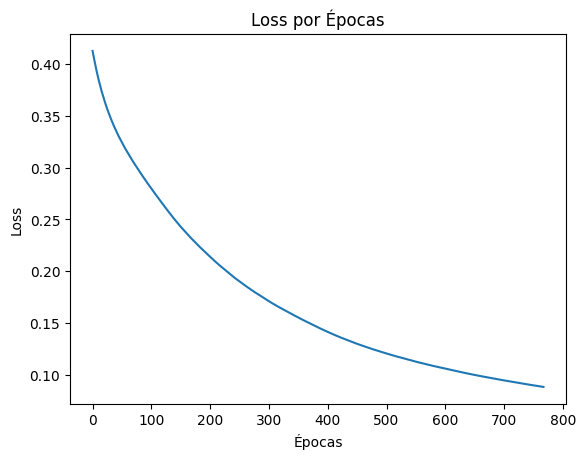

In [122]:
import matplotlib.pyplot as plt

# #LOSS CURVE MLP_1
# modelMlpRelu = MLPClassifier(hidden_layer_sizes=(10,), activation="relu", max_iter=1800)
# modelMlpRelu = modelMlpRelu.fit(X_train[0], y_train[0])
# plt.plot(modelMlpRelu.loss_curve_)
# plt.title('Loss por Épocas')
# plt.xlabel('Épocas')
# plt.ylabel('Loss')
# plt.legend(['TREINAMENTO'])

# #LOSS CURVE MLP_2
# modelMlpRelu2 = MLPClassifier(hidden_layer_sizes=(3,2), activation="relu", max_iter=2500)
# modelMlpRelu2 = modelMlpRelu2.fit(X_train[0], y_train[0])
# plt.plot(modelMlpRelu2.loss_curve_)
# plt.title('Loss por Épocas')
# plt.xlabel('Épocas')
# plt.ylabel('Loss')

# #LOSS CURVE MLP_3
# modelMlpTanh = MLPClassifier(hidden_layer_sizes=(3,), activation="tanh", max_iter=1500)
# modelMlpTanh = modelMlpTanh.fit(X_train[0], y_train[0])
# plt.plot(modelMlpTanh.loss_curve_)
# plt.title('Loss por Épocas')
# plt.xlabel('Épocas')
# plt.ylabel('Loss')

#LOSS CURVE MLP_4
modelMlpTanh2 = MLPClassifier(hidden_layer_sizes=(3,), activation="tanh", max_iter=1300)
modelMlpTanh2 = modelMlpTanh2.fit(X_train[0], y_train[0])
plt.plot(modelMlpTanh2.loss_curve_)
plt.title('Loss por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Loss')